# IMPORTING LIBRARIES


In [ ]:
import pandas as pd                      # import pandas for data analysis
import numpy as np                       # NumPy for calculating N-dimensional array
import matplotlib.pyplot as plt          # to visualize the data. 
import statsmodels.api as sm
import seaborn as sns
sns.set()                               #overwrite the graphics of matlobin graph

# IMPORT DATAFRAME

In [ ]:
df=pd.read_csv('/content/Concrete_Data_Yeh.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Descriptive statistics of the dataset

In [ ]:
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


# Define Dependent and Independent variable

In [ ]:
X=df.iloc[:,0:8]          # Independent variable OR
                          # df1=[['names of the columns separted by comma]]
X.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [ ]:
Y =df['csMPa'] # Dependent variable
Y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: csMPa, dtype: float64

# EXPLORE THE DATA

In [ ]:
x=sm.add_constant(x)
result=sm.OLS(Y,x).fit()
result.summary()



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  csMPa   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     204.3
Date:                Mon, 28 Nov 2022   Prob (F-statistic):          6.29e-206
Time:                        15:35:38   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -23.3312     26.586     -0.878      0.380     -75.500      28.837
cement               0.1198      0.008     14.113      0.000       0.103       0.136
slag                 0.1039      0.010     10.247      0.000       0.084       0.124
flyash               0.0879      0.013      6.988      0.000       0.063       0.113
water               -0.1499      0.040     -3.731      0.000      -0.229      -0.071
superplasticizer     0.2922      0.093      3.128      0.002       0.109       0.476
coarseaggregate      0.0181      0.009      1.926      0.054      -0.000       0.037
fineaggregate        0.0202      0.011      1.887      0.059      -0.001       0.041
age                  0.1142      0.005     21.046      0.000       0.104       0.125
==============================================================================
Omnibus:                        5.378   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.304
Skew:                          -0.174   Prob(JB):                       0.0705
Kurtosis:                       3.045   Cond. No.                     1.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_pred = result.predict(x)
residuals =Y-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))



Mean of Residuals 8.079491768176984e-14


# Check for Homoscedasticity
### #Homoscedasticity means that the residuals have equal or almost equal variance across theregression line. By plotting the error terms with predicted terms we can check that there shouldnot be any pattern in the error terms.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


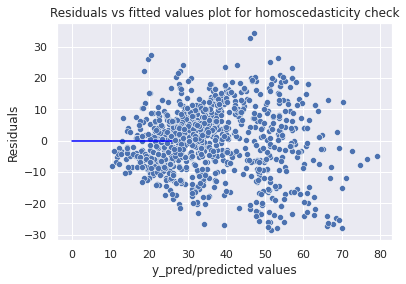

In [ ]:
p= sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
#plt.ylim(-10,10)
#plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')


# Check for Normality of error terms/residuals

## #The residual terms are pretty much normally distributed for the number of test points we took.Remember the central limit theorem which says that as the sample size increases thedistribution tends to be normal. A skew is also visible from the plot. It's very difficult to getperfect curves, distributions in real life data.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


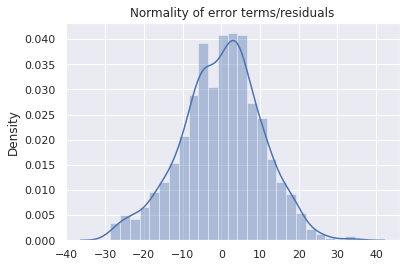

In [ ]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

# No autocorrelation of residuals
When the residuals are autocorrelated, it means that the current value is dependent of the
previous (historic) values and that there is a definite unexplained pattern in the Y variable that
shows up in the error terms. Though it is more evident in time series data. In plain terms
autocorrelation takes place when there's a pattern in the rows of the data. This is usual in time series data as there is a pattern of time for eg. Week of the day effect which is a very famous pattern seen in stock markets where people tend to buy stocks more towards the beginning of
weekends and tend to sell more on Mondays. There's been great study about this phenomenon
and it is still a matter of research as to what actual factors cause this trend. There should not be
autocorrelation in the data so the error terms should not form any pattern

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


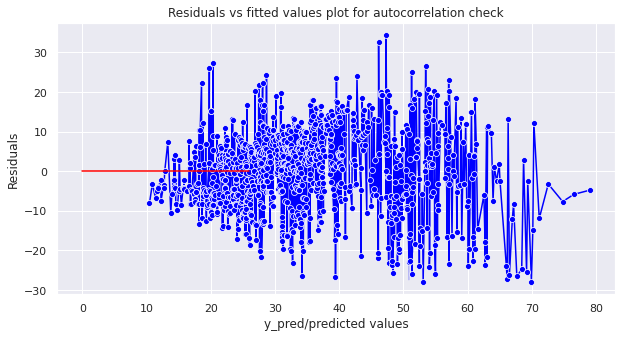

In [ ]:
plt.figure(figsize=(10,5))
p = sns.lineplot(y_pred,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
#plt.ylim(-10,10)
#plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')


# No perfect multicollinearity
### In regression, multicollinearity refers to the extent to which independent variables are correlated.
Multicollinearity affects the coefficients and p-values, but it does not influence the predictions,
precision of the predictions, and the goodness-of-fit statistics. If your primary goal is to make
predictions, and you don’t need to understand the role of each independent variable, you don’t
need to reduce severe multicollinearity.

In [ ]:
plt.figure(figsize=(15,15)) # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(X.cor(), annot=True,cmap='RdYlGn',square=True) # seaborn has very simple s


AttributeError: ignored

<Figure size 1080x1080 with 0 Axes>

# Boxplot for Depentdent variable

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


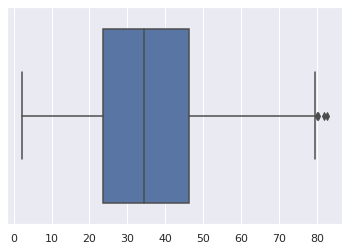

In [ ]:
sns.boxplot(Y)

plt.show()

# Boxplot for Independent variable

<function matplotlib.pyplot.show(*args, **kw)>

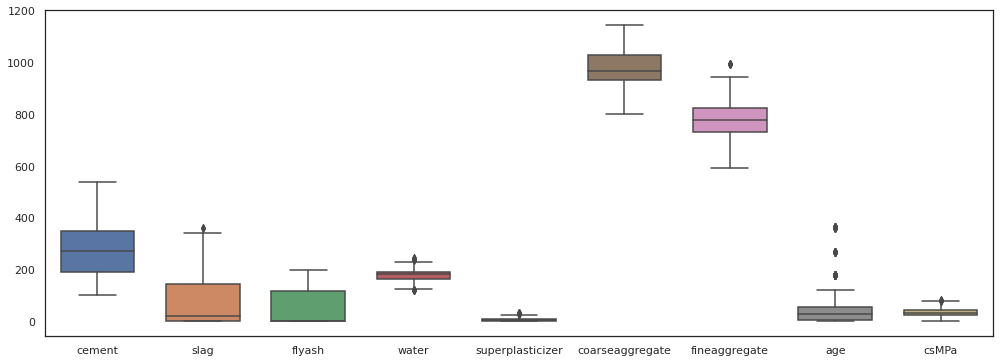

In [ ]:
# set style
sns.set(style='white')

fig, ax =plt.subplots(figsize=(17,6))
g = sns.boxplot(data=df,width=0.7)
plt.show

# Normalize the dataset
 

In [ ]:
from sklearn import preprocessing
y_array = np.array(df['csMPa'])
normalized_arr = preprocessing.normalize([y_array])
print(normalized_arr)

[[0.06306859 0.04879754 0.03175112 ... 0.0186864  0.0258377  0.02554597]]


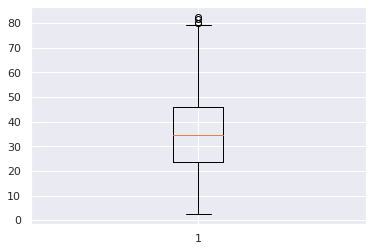

In [ ]:
plt.boxplot(y_array)

plt.show()

# Scatterplot

# encode qualitative variable as quantitative variable